<a href="https://www.kaggle.com/code/nainapandey96/zoo-animal-clustering?scriptVersionId=98691879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_zoo= pd.read_csv("../input/zoo-animals/zoo.csv")
df_zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
target= df_zoo['class_type']
target.unique()

array([1, 4, 2, 7, 6, 5, 3])

<AxesSubplot:xlabel='class_type', ylabel='count'>

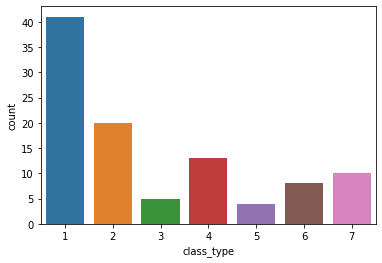

In [4]:
import seaborn as sns
sns.countplot(x= target)

In [5]:
feature= df_zoo.drop('class_type', axis=1)

In [6]:
new= df_zoo.iloc[:, 1:16]

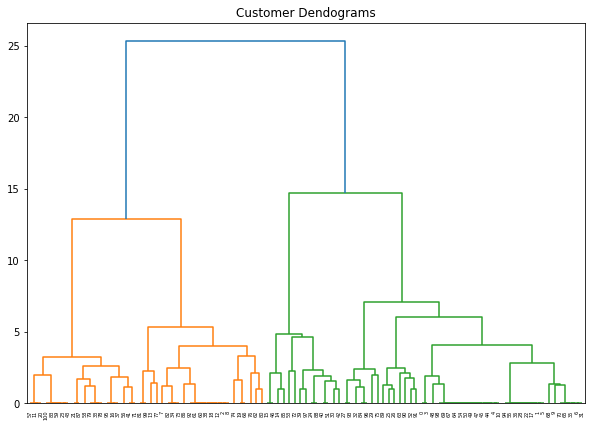

In [7]:
#creating dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title('Customer Dendograms')
dend=shc.dendrogram(shc.linkage(new,method='ward'))

In [8]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model= AgglomerativeClustering(n_clusters=7, linkage='average', affinity='cosine')
model.fit(new)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [9]:
model.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 2, 0, 5, 1, 1, 2, 1, 0, 0, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 4, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 0, 6, 2, 2, 4, 3, 0, 2, 1, 1, 0, 2,
       1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 3, 2])

In [10]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [11]:
target=target-1
target.unique()

array([0, 3, 1, 6, 5, 4, 2])

In [12]:
from sklearn.metrics import mean_squared_error
score= mean_squared_error(target, model.labels_)
abs_score= np.sqrt(score)
print(abs_score)

2.2733932417606875


In [13]:
from sklearn.cluster import KMeans
 
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=42)  
kmeans.fit(new)    


KMeans(n_clusters=7, random_state=42)

In [14]:
score= mean_squared_error(target, kmeans.labels_)
abs_score= np.sqrt(score)
print(abs_score)

2.7159229782455867
